In [1]:
import pandas as pd

In [24]:
traindf=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [25]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
traindf.shape

(891, 12)

In [27]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
traindf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
import matplotlib.pyplot as pp
import seaborn as sns

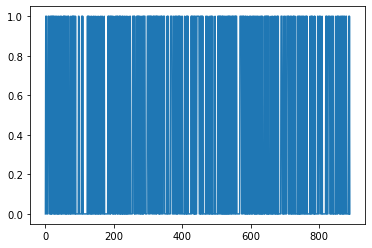

In [29]:
pp.plot(traindf['Survived'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

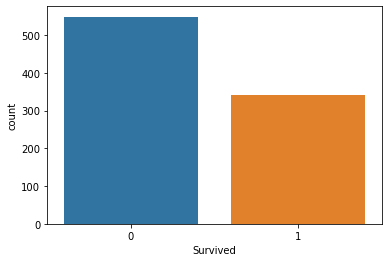

In [30]:
sns.countplot(traindf['Survived'],data=traindf)

<AxesSubplot:xlabel='Age', ylabel='Count'>

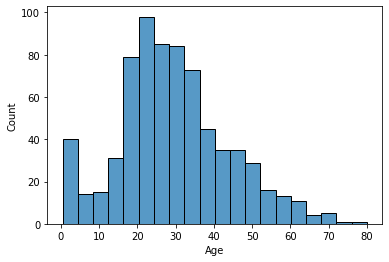

In [31]:
sns.histplot(data=traindf,x=traindf['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

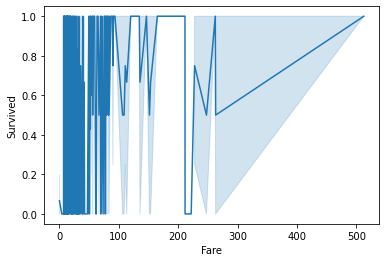

In [32]:
sns.lineplot(data=traindf,x=traindf['Fare'],y=traindf['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

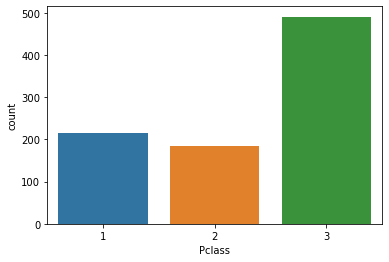

In [33]:
sns.countplot(data=traindf,x=traindf['Pclass'])

In [34]:
traindf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

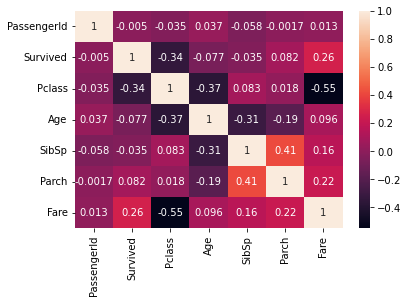

In [35]:
sns.heatmap(traindf.corr(),annot=True)

In [39]:
traindf['Age'].isnull().sum()

177

In [38]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
for i in traindf.columns:
    print('Null value in column {}  :    {}'.format(i,traindf[i].isnull().sum()))

Null value in column PassengerId  :    0
Null value in column Survived  :    0
Null value in column Pclass  :    0
Null value in column Name  :    0
Null value in column Sex  :    0
Null value in column Age  :    177
Null value in column SibSp  :    0
Null value in column Parch  :    0
Null value in column Ticket  :    0
Null value in column Fare  :    0
Null value in column Cabin  :    687
Null value in column Embarked  :    2


In [53]:
traindf['Cabin']=traindf['Cabin'].fillna(0)

In [54]:
traindf['Age']=traindf['Age'].fillna(traindf['Age'].mean())

In [55]:
traindf['Embarked']=traindf['Embarked'].fillna(0)

In [56]:
for i in traindf.columns:
    print('Null value in column {}  :    {}'.format(i,traindf[i].isnull().sum()))

Null value in column PassengerId  :    0
Null value in column Survived  :    0
Null value in column Pclass  :    0
Null value in column Name  :    0
Null value in column Sex  :    0
Null value in column Age  :    0
Null value in column SibSp  :    0
Null value in column Parch  :    0
Null value in column Ticket  :    0
Null value in column Fare  :    0
Null value in column Cabin  :    0
Null value in column Embarked  :    0


In [57]:
traindf['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder2=LabelEncoder()

In [66]:
traindf['sex']=encoder.fit_transform(traindf['Sex'])
traindf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
sex              int32
dtype: object

In [70]:
traindf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [97]:
traindf=traindf.drop(['Fare','Age'],axis=1)

In [99]:
traindf.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
sex            int32
dtype: object

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [100]:
x=traindf.drop(['Survived'],axis=1)

In [101]:
y=traindf.Survived
print(x.shape)
print(y.shape)

(891, 5)
(891,)


In [120]:
xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape,ytrain.shape)

(712, 5) (712,)


In [121]:
random=cross_val_score(RandomForestClassifier(),x,y,cv=5).mean()
random

0.7599271859895801

In [122]:
svm=cross_val_score(SVC(),x,y,cv=6).mean()
svm

0.6161572646471976

In [123]:
decision=cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()
decision

0.7049149457033457

In [124]:
from sklearn.linear_model import LogisticRegression
logistic=cross_val_score(LogisticRegression(),x,y,cv=3).mean()
logistic

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.8024691358024691

In [125]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [126]:
ypre=model.predict(xval)

In [127]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ypre,yval)

In [128]:
score

0.8100558659217877

In [129]:
import xgboost as xg

In [136]:
xgb_cl= xg.XGBClassifier()

In [137]:
xgb_cl.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
ypredict=xgb_cl.predict(xval)

In [139]:
score_xgb=accuracy_score(ypredict,yval)

In [140]:
score

0.8100558659217877